In [1]:
#! /usr/local/opt/python/bin/python3.7 -m pip install -U matplotlib
#! /usr/local/opt/python/bin/python3.7 -m pip install seaborn

In [81]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn 
import numpy as np
import seaborn as sns

#### Reading and opening CheckM results file with completeness and contamination values

In [35]:
f = open("CheckM_results_file", "r")
file = f.read()

#### Creating list and dataframe

In [36]:
type(file)

str

In [37]:
fileList = file.split("\n")

In [38]:
fileList[1]

'S10C10200\troot (UID1)\t5656\t56\t24\t56\t0\t0\t0\t0\t0\t0.00\t0.00\t0.00'

In [39]:
df = pd.DataFrame(fileList)

#### Cleaning df and seperating string to columns

In [40]:
df = df.replace(' ', '_', regex=True)

In [41]:
df.head(2)
# Bin Id	Marker lineage	# genomes	# markers	# marker sets	0	1	2	3	4	5+	Completeness	Contamination	S'

,0
0,Bin_Id\tMarker_lineage\t#_genomes\t#_markers\t...
1,S10C10200\troot_(UID1)\t5656\t56\t24\t56\t0\t0...


In [42]:
df.columns = ['bins']

In [43]:
df[['Bin_Id','Marker_lineage', '#_genomes', '#_markers', '#_marker_sets', '0', '1', '2', '3', '4', '5+'\
   , 'Completeness', 'Contamination', 'Strain heterogeneity']] = df.bins.str.split("\t",expand=True)

In [44]:
df

,bins,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
0,Bin_Id\tMarker_lineage\t#_genomes\t#_markers\t...,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain_heterogeneity
1,S10C10200\troot_(UID1)\t5656\t56\t24\t56\t0\t0...,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
2,S10C1032\to__Bacteroidales_(UID2654)\t163\t486...,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.00
3,S10C1039\to__Lactobacillales_(UID355)\t490\t33...,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.00
4,S10C1094\tk__Bacteria_(UID203)\t5449\t104\t58\...,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,S9C8881\to__Bacteroidales_(UID2657)\t160\t492\...,S9C8881,o__Bacteroidales_(UID2657),160,492,269,58,431,3,0,0,0,88.01,0.63,0.00
2963,S9C92\to__Actinomycetales_(UID1572)\t580\t286\...,S9C92,o__Actinomycetales_(UID1572),580,286,172,11,275,0,0,0,0,96.12,0.00,0.00
2964,S9C962\to__Campylobacterales_(UID3068)\t106\t4...,S9C962,o__Campylobacterales_(UID3068),106,477,284,13,463,1,0,0,0,96.30,0.18,100.00
2965,S9C99\to__Selenomonadales_(UID1024)\t64\t334\t...,S9C99,o__Selenomonadales_(UID1024),64,334,167,103,227,4,0,0,0,78.94,2.10,50.00


In [45]:
# drop first row because we get double headers 
df = df.drop(0)

# drop the last row since it is empty
last_row = len(df)
df = df.drop(df.index[last_row-1]) 

In [46]:
df

,bins,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
1,S10C10200\troot_(UID1)\t5656\t56\t24\t56\t0\t0...,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
2,S10C1032\to__Bacteroidales_(UID2654)\t163\t486...,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.00
3,S10C1039\to__Lactobacillales_(UID355)\t490\t33...,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.00
4,S10C1094\tk__Bacteria_(UID203)\t5449\t104\t58\...,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.00
5,S10C10947\troot_(UID1)\t5656\t56\t24\t56\t0\t0...,S10C10947,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,S9C86\tc__Bacilli_(UID285)\t586\t325\t181\t45\...,S9C86,c__Bacilli_(UID285),586,325,181,45,272,8,0,0,0,85.55,2.23,25.00
2962,S9C8881\to__Bacteroidales_(UID2657)\t160\t492\...,S9C8881,o__Bacteroidales_(UID2657),160,492,269,58,431,3,0,0,0,88.01,0.63,0.00
2963,S9C92\to__Actinomycetales_(UID1572)\t580\t286\...,S9C92,o__Actinomycetales_(UID1572),580,286,172,11,275,0,0,0,0,96.12,0.00,0.00
2964,S9C962\to__Campylobacterales_(UID3068)\t106\t4...,S9C962,o__Campylobacterales_(UID3068),106,477,284,13,463,1,0,0,0,96.30,0.18,100.00


In [47]:
# drop first coulmn that is the original combined string
df = df.iloc[: , 1:]

In [48]:
df.Completeness = df.Completeness.astype(float)
df.Contamination = df.Contamination.astype(float)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Plotting bins based on completeness and contamination

In [49]:
print(max(df.Completeness))
print(max(df.Contamination))

100.0
265.69


In [50]:
query = 100
df.query('Contamination > %d' %query)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
143,S12C3084,k__Bacteria_(UID203),5449,104,58,1,19,13,70,1,0,98.28,181.22,27.51
1493,S36C456,k__Bacteria_(UID203),5449,102,57,3,21,23,27,20,8,97.93,206.56,17.11
2479,S53C1778,k__Bacteria_(UID203),5449,104,58,2,30,21,16,17,18,98.28,265.69,26.72
2804,S8C1094,k__Bacteria_(UID203),5449,104,58,1,6,40,56,1,0,99.66,176.99,28.50


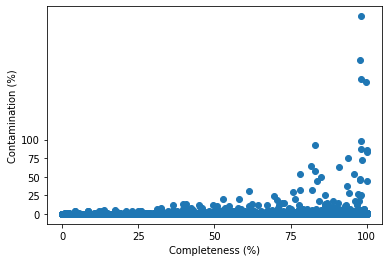

In [51]:

plt.scatter(df.Completeness, df.Contamination)

plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')



plt.xticks(np.arange(0, 101, 25))
plt.yticks(np.arange(0, 101, 25))

plt.show() 

In [52]:
#removing the bins with contamination above 100%

def drop_at_index(df, indexList):
    indexList.sort(reverse=True)
    for i in indexList:
        df = df.drop(i) 
#         print(df.query('Contamination > %d' %100))
    return df   

In [53]:
indexList = [143, 1493, 2479, 2804]
df_cont_below_100 = drop_at_index(df, indexList)

In [54]:
#adding an extra column to define the colors in the scatterplot
# 0 = highQ, 1 = middelHigh, 2 = middleLow, 3 = low 
def conditions(s):
    
    QS = s['Completeness'] - (5 * s['Contamination'])
    
    if (s['Contamination'] < 5) and (s['Completeness'] > 90):
        return 0
    elif (s['Contamination'] < 10) and (s['Completeness'] > 50) and QS > 50:
        return 1
    elif (s['Contamination'] < 10) and (s['Completeness'] > 50) and QS <= 50:
        return 2
    else:
        return 3

In [55]:
df_cont_below_100['bin_class'] = df_cont_below_100.apply(conditions, axis=1)
df['bin_class'] = df_cont_below_100.apply(conditions, axis=1)

In [84]:
df_cont_below_100.head(10)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class
1,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00,3
2,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.00,3
3,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.00,0
4,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.00,3
5,S10C10947,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00,3
6,S10C1113,o__Lactobacillales_(UID355),490,332,181,1,331,0,0,0,0,99.45,0.00,0.00,0
7,S10C119,o__Lactobacillales_(UID375),177,350,163,86,261,3,0,0,0,71.36,1.07,100.00,1
8,S10C1295,o__Campylobacterales_(UID3068),106,477,284,224,249,4,0,0,0,52.55,0.66,25.00,2
9,S10C1297,o__Lactobacillales_(UID374),471,350,191,8,341,1,0,0,0,96.60,0.26,0.00,0
10,S10C13511,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00,3


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


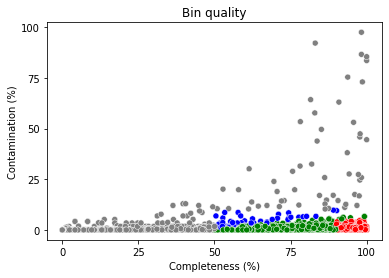

In [133]:
colormap = np.array(['red', 'green', 'blue', 'grey'])

sns.scatterplot(df_cont_below_100.Completeness, df_cont_below_100.Contamination, c=colormap[df_cont_below_100['bin_class']])


plt.title('Bin quality')
plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')
plt.xticks(np.arange(0, 101, 25))
plt.yticks(np.arange(0, 101, 25))

plt.show()

([<matplotlib.axis.XTick at 0x1207f1fd0>,
 [Text(0, 0, 'High Quality'),
  Text(1, 0, 'Middle Quality'),
  Text(2, 0, 'Low Quality')])

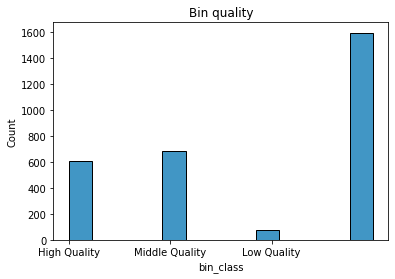

In [146]:
sns.histplot(df.bin_class, multiple='stack')

plt.title('Bin quality')
# plt.xticks(np.arange(4), ['High Quality', 'Middle high Quality','Middle low Quality', 'Low Quality']) 
plt.xticks(np.arange(3), ['High Quality', 'Middle Quality', 'Low Quality'])
plt.xticks(np.arange(0, 3, 1))


##### Making lists of the good and middle quality bins lists

In [63]:
# df_HighQ = df.loc[df["bin_class"] == 0]

In [64]:
# df_HighMiddleQ =  df.loc[df["bin_class"] < 3]

In [68]:
# df_HighQ["Bin_Id"].to_csv("highQ_bins", index=False)

In [69]:
# df_HighMiddleQ["Bin_Id"].to_csv("high_middle_Q_bins", index=False)

#### Identifying Lactibacillus bins 

In [72]:
# df.loc[df["Marker_lineage"] == 0]
df_lactobacillus = df[df['Marker_lineage'].str.contains("Lactobacillus")]

([<matplotlib.axis.XTick at 0x11e996fd0>,
 [Text(0, 0, 'High Quality'),
  Text(1, 0, 'Middle high Quality'),
  Text(2, 0, 'Middle low Quality'),
  Text(3, 0, 'Low Quality')])

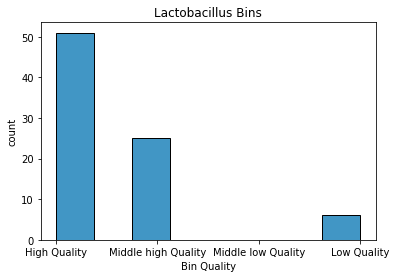

In [137]:
color_blind = sns.color_palette("colorblind", 4)
color_b = np.array(color_blind)
sns.histplot(df_lactobacillus.bin_class)

plt.xticks(np.arange(0, 4, 1))
plt.xlabel('Bin Quality')
plt.ylabel('count')
plt.title('Lactobacillus Bins')

plt.xticks(np.arange(4), ['High Quality', 'Middle high Quality','Middle low Quality', 'Low Quality']) 
# ax.set_xlabels(['High Quality', 'Middle high Quality','Middle low Quality', 'Low Quality'])


In [138]:
df_lactobacillus


,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class
17,S10C205,g__Lactobacillus_(UID377),91,430,154,43,385,2,0,0,0,92.48,0.21,100.00,0.0
30,S10C362,g__Lactobacillus_(UID377),91,430,154,82,345,3,0,0,0,88.12,0.65,100.00,1.0
43,S10C569,g__Lactobacillus_(UID380),58,449,129,8,441,0,0,0,0,96.90,0.00,0.00,0.0
69,S11C205,g__Lactobacillus_(UID377),91,430,154,80,350,0,0,0,0,86.04,0.00,0.00,1.0
87,S11C569,g__Lactobacillus_(UID380),58,449,129,6,399,43,1,0,0,96.81,12.08,4.35,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,S8C362,g__Lactobacillus_(UID377),91,430,154,30,397,3,0,0,0,91.77,0.26,100.00,0.0
2880,S8C569,g__Lactobacillus_(UID380),58,449,129,9,439,1,0,0,0,95.71,0.13,100.00,0.0
2919,S9C205,g__Lactobacillus_(UID377),91,430,154,39,388,3,0,0,0,89.87,0.24,100.00,1.0
2938,S9C362,g__Lactobacillus_(UID377),91,430,154,28,397,5,0,0,0,91.66,1.06,100.00,0.0
